In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import time 
import random

#Função para plotar uma árvore:

In [ ]:
def hierarchy_pos(G, root=None , width =1.0 , vertgap =0.2 , vertloc =0, xcenter = 0.5):
  if not nx.is_tree(G):
    raise TypeError('cannot_use_hierarchy_pos_on_a_graph_that_is_not_a_tree')
  if root is None :
    if isinstance(G, nx.DiGraph):
      root = nex(iter(nx.topologicalsort(G)))
    else:
      root = random.choice(list(G.nodes))

  def _hierarchy_pos(G,root,width =1.,vertgap =0.2,vertloc =0,xcenter =0.5,pos=None,parent=None ) :
    if pos is None :
      pos = {root:(xcenter,vertloc)}
    else :
      pos[root] = (xcenter,vertloc)
    children = list(G.neighbors(root))
    if not isinstance(G,nx.DiGraph ) and parent is not None :
      children.remove(parent)
    if len(children) != 0:
      dx = width/len(children)
      nextx = xcenter -(width/2) -(dx/2)
      for child in children:
        nextx += dx
        pos = _hierarchy_pos(G,child,width = dx ,vertgap = vertgap,vertloc = vertloc -vertgap,xcenter = nextx,pos=pos ,parent = root)

    return pos

  return _hierarchy_pos(G,root,width,vertgap,vertloc,xcenter)

#Árvore Binária:

In [ ]:
class Node:
    def __init__(self,data):
        self.data = data
        self.left = None
        self.right = None
       
    def __str__(self):
        return str(self.data)
    
    def incluir(self, valor):
      if (self.left is None):
        self.left = Node(valor)
      elif (self.right is None):
        self.right = Node(valor)
      else:
        self.left.incluir(valor)
    
    def busca(self, valor):
      if (self.data == valor or self.left.data == valor or self.right.data == valor):
        return True
      else:
        aux=self.left
        while(aux is not None):
          if(aux.left is None or aux.right is None):
            return False
          elif (aux.data == valor or aux.left.data == valor or aux.right.data == valor):
            return True
          else:
            aux=aux.left
        return False

class Arvore_Binaria:
    def __init__(self,data=None):
        if data:
          node = Node(data)
          self.root = node
        else:
          self.root = None

    #percorrendo a arvore da esquerda para direita de cima para baixo
    def percurso_simetrico(self,node = None):
        if node is None:
            node = self.root
        if node.left:
            print('(',end='')
            self.percurso_simetrico(node.left)
        print(node,end=' ')
        if node.right:
            self.percurso_simetrico(node.right)
            print(')',end='')

    #Percorrendo a árvore primeiro pelo ramo da esquerda depois o ramo da direita
    #No ramo da esquerda,ele analisa primeiro os elementos da esquerda depois os da direita,depois ele volta ate a raiz e vai para o ramo da direita
    #No ramo da direita,ele analisa primeiro os elementos da esquerda depois os da direita,depois ele volta ate a raiz
    def percurso_pos_ordem(self,node = None):
        if node is None:
            node = self.root
        if node.left:
            self.percurso_pos_ordem(node.left)
        if node.right:
            self.percurso_pos_ordem(node.right)
        print(node)

    def altura(self,node = None):
        if node is None:
            node = self.root
        hleft = 0
        hright = 0
        if node.left:
            hleft = self.altura(node.left)
        if node.right:
            hright = self.altura(node.right)
        if hright > hleft:
            return hright + 1
        return hleft + 1


    def inserir(self,valor):
      if self.root is None:
        self.root = Node(valor)
      else:
        if(self.root.left is None):
          self.root.left = Node(valor)
        elif(self.root.right is None):
          self.root.right = Node(valor)
        else:
          self.root.left.incluir(valor)

    def buscar(self, valor):
        if (self.root.data == valor):
          return True
        if (self.root.left.data == valor or self.root.right.data == valor):
          return True
        else:
          a=self.root.left.busca(valor)
          return a

    def altura(self,node = None):
        if node is None:
            node = self.root
        hleft = 0
        hright = 0
        if node.left:
            hleft = self.altura(node.left)
        if node.right:
            hright = self.altura(node.right)
        if hright > hleft:
            return hright + 1
        return hleft + 1

#Árvore Binária de Busca:

In [ ]:
class Arvore_Binaria_de_Busca(Arvore_Binaria):
    def inserir(self,valor):
        parente = None
        aux = self.root
        while(aux):
            parente = aux
            if valor < aux.data:
                aux = aux.left
            else:
                aux = aux.right

        if parente is None:
            self.root = Node(valor)
        elif valor < parente.data:
            parente.left = Node(valor)
        else:
            parente.right = Node(valor)

    def buscar(self,valor):
        return self._buscar(valor,self.root)

    def _buscar(self,valor,node):
        if node is None:
            return node
        if node.data == valor:
            return Arvore_Binaria(node)
        if valor < node.data:
            return self._buscar(valor,node.left)
        return self._buscar(valor,node.right)

    '''def buscar(self,valor,node = 0):
        if node == 0:
            node = self.root
        if node is None or node.data == valor:
            return Arvore_Binaria(valor)
        if valor < node.data:
            return self.buscar(valor,node.left)

        return self.buscar(valor,node.right)'''

#Árvore AVL:

In [ ]:
class Node1:
    def __init__(self,data = None):
        self.data = data
        self.left = None
        self.right = None
        self.parent = None
        self.altura = 1

class Arvore_AVL:
    def __init__(self):
        self.root = None

    def inserir(self,data):
        if self.root is None:
            self.root = Node1(data)
        else:
            self._inserir(data,self.root)

    def _inserir(self,data,node):
        if data < node.data:
            if node.left is None:
                node.left = Node1(data)
                node.left.parent = node
                self._inspecao(node.left)
            else:
                self._inserir(data,node.left)
    
        elif data > node.data:
            if node.right is None:
                node.right = Node1(data)
                node.right.parent = node
                self._inspecao(node.right)
            else:
                self._inserir(data,node.right)
    
    def profundidade(self,data):
        if self.root is None:
            return None
        else:
            return self._profundidade(data,self.root,0)

    def _profundidade(self,data,node,alt):
        if data == node.data:
            return alt
        elif data < node.data and node.left != None:
            return self._profundidade(data,node.left,alt + 1)
        elif data > node.data and node.right != None:
            return self._profundidade(data,node.right,alt + 1)

    def altura(self,node = None):
        if node.data != None:
            return self._altura(node,0)
        if self.root != None:
            return self._altura(self.root,0)
        else:
            return 0

    def _altura(self,node,alt):
        if node is None:
            return alt
        alt_esq = self._altura(node.left,alt + 1)
        alt_dir = self._altura(node.right,alt + 1)
        return max(alt_esq,alt_dir)

    def _inspecao(self,node,lista = []):
        if node.parent is None: 
          return 
        lista = [node] + lista
        
        left_altura = self.get_altura(node.parent.left)
        right_altura = self.get_altura(node.parent.right)

        if abs(left_altura - right_altura) > 1:
            lista = [node.parent] + lista
            self._balanco(lista[0],lista[1],lista[2])
        
        nova_altura = 1 + node.altura
        if node.parent is None:
          return
        elif nova_altura > node.parent.altura:
            node.parent.altura = nova_altura
        
        self._inspecao(node.parent,lista)

    def _balanco(self,node1,node2,node3):
        if node2 == node1.left and node3 == node2.left:
            self._rotacao_direita(node1)
        elif node2 == node1.left and node3 == node2.right:
            self._rotacao_esquerda(node2)
            self._rotacao_direita(node1)
        elif node2 == node1.right and node3 == node2.right:
            self._rotacao_esquerda(node1)
        elif node2 == node1.right and node3 == node2.left:
            self._rotacao_direita(node2)
            self._rotacao_esquerda(node1)


    def _rotacao_direita(self,node):
        sub_root = node.parent
        y = node.left
        t3 = y.right
        y.right = node
        node.parent = y
        node.left = t3
        if t3 != None:
            t3.parent = node
        y.parent = sub_root
        if y.parent is None:
            self.root = y
        else:
            if y.parent.left == node:
                y.parent.left = y
            else:
                y.parent.right = y
        node.altura = 1 + max(self.get_altura(node.left), self.get_altura(node.right))
        y.altura = 1 + max(self.get_altura(y.left),self.get_altura(y.right))

    def _rotacao_esquerda(self,node):
        sub_root = node.parent
        y = node.right
        t2 = y.left
        y.left = node
        node.parent = y
        node.right = t2
        if t2 != None:
            t2.parent = node
        y.parent = sub_root
        if y.parent is None:
            self.root = y
        else:
            if y.parent.left == node:
                y.parent.left = y
            else:
                y.parent.right = y
        node.altura = 1 + max(self.get_altura(node.left),self.get_altura(node.right))
        y.altura = 1 + max(self.get_altura(y.left),self.get_altura(y.right))

    def get_altura(self,node):
        if node is None: 
            return 0
        else:
            return node.altura

    def buscar(self,valor):
        return self._buscar(valor,self.root)

    def _buscar(self,valor,node):
        if node is None:
            return node
        if node.data == valor:
            return Arvore_Binaria(node)
        if valor < node.data:
            return self._buscar(valor,node.left)
        return self._buscar(valor,node.right)

#Testes


Construção das tabelas com os valores

In [ ]:
#@title Numeros a serem inseridos
p1 = "1,2,3,4,5,6,7,8,9" #@param {type:"string"}

In [ ]:
lista=[]
p12=p1.split(",")
for i in p12:
  lista.append(int(i))
print(lista)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Busca de valores ordenados

Tempo de busca de valores ordenados na arvore binaria: 0.04935264587402344 milissegundos!
Tempo de busca de valores ordenados na arvore binaria de busca: 0.06008148193359375 milissegundos!
Tempo de busca de valores ordenados na arvore AVL: 0.04124641418457031 milissegundos!
Melhor arvore: arvore AVL!



Representacao grafica da arvore Avl:


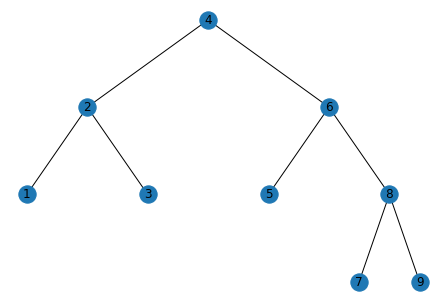

In [ ]:
arvorebi = Arvore_Binaria()
for i in lista:
  arvorebi.inserir(i)
arvorebu = Arvore_Binaria_de_Busca()
arvoreavl = Arvore_AVL()
for i in lista:
  arvorebu.inserir(i)
  arvoreavl.inserir(i)

inicio1=time.time()
arvorebi.buscar(5)
fim1=time.time()
inicio2=time.time()
arvorebu.buscar(5)
fim2=time.time()
inicio3=time.time()
arvoreavl.buscar(5)
fim3=time.time()

print("Tempo de busca de valores ordenados na arvore binaria: "+str((fim1-inicio1)*1000)+" milissegundos!")
print("Tempo de busca de valores ordenados na arvore binaria de busca: "+str((fim2-inicio2)*1000)+" milissegundos!")
print("Tempo de busca de valores ordenados na arvore AVL: "+str((fim3-inicio3)*1000)+" milissegundos!")
print("Melhor arvore: arvore AVL!\n\n\n")
print("Representacao grafica da arvore Avl:")
G=nx.Graph( )
G.add_edges_from( [ ( 4 , 2 ) , ( 4 , 6 ) , ( 2 , 1 ) , ( 2 , 3 ), (6, 5), (6,8), (8,7),(8,9)] )
pos = hierarchy_pos(G,4)
nx.draw(G,pos=pos,with_labels=True)

Inserção de valores ordenados

Tempo de insercao de valores ordenados na arvore binaria: 0.08344650268554688 milissegundos!
Tempo de insercao de valores ordenados na arvore binaria de busca: 0.07867813110351562 milissegundos!
Tempo de insercao de valores ordenados na arvore AVL: 0.15306472778320312 milissegundos!
Melhor arvore: arvore binaria de busca!



Representacao grafica da arvore binaria de busca:


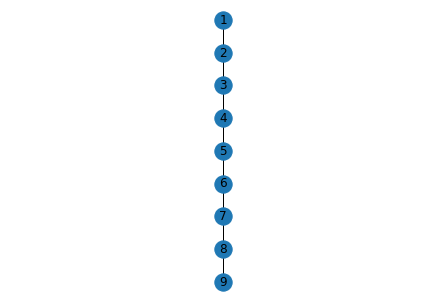

In [ ]:
arvorebi2 = Arvore_Binaria()
inicioabi2=time.time()
for i in lista:
  arvorebi2.inserir(i)
fimabi2=time.time()
arvorebu2 = Arvore_Binaria_de_Busca()
arvoreavl2 = Arvore_AVL()
inicioabu2=time.time()
for i in lista:
  arvorebu2.inserir(i)
fimabu2=time.time()
for i in lista:
  arvoreavl2.inserir(i)
fimavl2=time.time()

print("Tempo de insercao de valores ordenados na arvore binaria: "+str((fimabi2-inicioabi2)*1000)+" milissegundos!")
print("Tempo de insercao de valores ordenados na arvore binaria de busca: "+str((fimabu2-inicioabu2)*1000)+" milissegundos!")
print("Tempo de insercao de valores ordenados na arvore AVL: "+str((fimavl2-fimabu2)*1000)+" milissegundos!")
print("Melhor arvore: arvore binaria de busca!\n\n\n")
print("Representacao grafica da arvore binaria de busca:")
G=nx.Graph( )
G.add_edges_from( [ ( 1 , 2 ) , ( 2 , 3 ) , ( 3 , 4 ) , ( 4 , 5 ), (5, 6), (6,7), (7,8),(8,9)] )
pos = hierarchy_pos(G,1)
nx.draw(G,pos=pos,with_labels=True)

Inserção valores aleatórios

Tempo da insercao na arvore binaria: 0.07343292236328125 milissegundos!
Tempo da insercao na arvore binaria de busca: 0.19431114196777344 milissegundos!
Tempo da insercao na arvore AVL: 0.18262863159179688 milissegundos!
Melhor arvore: arvore binaria!



Representacao grafica da arvore binaria:


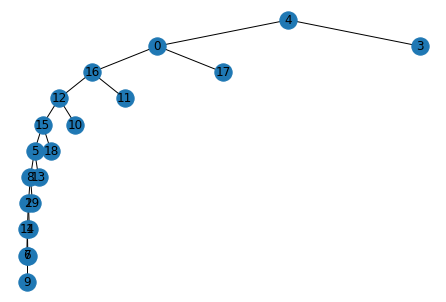

In [ ]:
arvorebi3 = Arvore_Binaria()
arvorebu3 = Arvore_Binaria_de_Busca()
arvoreavl3 = Arvore_AVL()
lista3=[4, 0, 3, 16, 17, 12, 11, 15, 10, 5, 18, 8, 13, 2, 19, 14, 1, 6, 7, 9]
iniciobi3=time.time()
for i in lista3:
  arvorebi3.inserir(i)
fimbi3=time.time()
iniciobu3=time.time()
for i in lista3:
  arvorebu3.inserir(i)
fimbu3=time.time()
inicioavl3=time.time()
for i in lista3:
  arvoreavl3.inserir(i)
fimavl3=time.time()

print("Tempo da insercao na arvore binaria: "+str((fimbi3-iniciobi3)*1000)+" milissegundos!")
print("Tempo da insercao na arvore binaria de busca: "+str((fimbu3-iniciobu3)*1000)+" milissegundos!")
print("Tempo da insercao na arvore AVL: "+str((fimavl3-inicioavl3)*1000)+" milissegundos!")
print("Melhor arvore: arvore binaria!\n\n\n")
print("Representacao grafica da arvore binaria:")
G=nx.Graph( )
G.add_edges_from( [ ( 4 , 0 ) , ( 4 , 3 ) , ( 0 , 16 ) , ( 0 , 17 ), (16, 12), (16,11), (12,15),(12,10), (15,5), (15,18),(5,8),(5,13),(8,2),(8,19),(2,14),(2,1),(14,6),(14,7),(6,9)] )
pos = hierarchy_pos(G,4)
nx.draw(G,pos=pos,with_labels=True)